Дипломная работа по курсу «Python для анализа данных»

Загрузить файл hr.csv (можно найти во сложении к заданию)\
Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)\
Рассчитать и визуализировать корреляционную матрицу для переменных\
Визуализировать несколько взаимосвязей между переменными\
С использованием t-test статистики проверить взаимосвязи между несколькими переменными\
Рассчитать сколько работников работает в каждом департаменте\
Показать распределение сотрудников по зарплатам\
Показать распределение сотрудников по зарплатам совместно с департаментами\
Сколько сотрудников покинули компанию\
Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию\
Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('hr.csv')

In [4]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
data.median(axis=0) # расчет медианы

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [7]:
data.mean(axis=0) # расчет среднего

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [11]:
data.mode(axis=0).head(1)  # расчет моды

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low


In [14]:
data.max(axis=0) # максимум

satisfaction_level               1
last_evaluation                  1
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
sales                    technical
salary                      medium
dtype: object

In [15]:
data.min(axis=0) # минимум

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
sales                      IT
salary                   high
dtype: object

In [16]:
data.std(axis=0) # стандартное отклонение

satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_montly_hours     49.943099
time_spend_company        1.460136
Work_accident             0.351719
left                      0.425924
promotion_last_5years     0.144281
dtype: float64

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

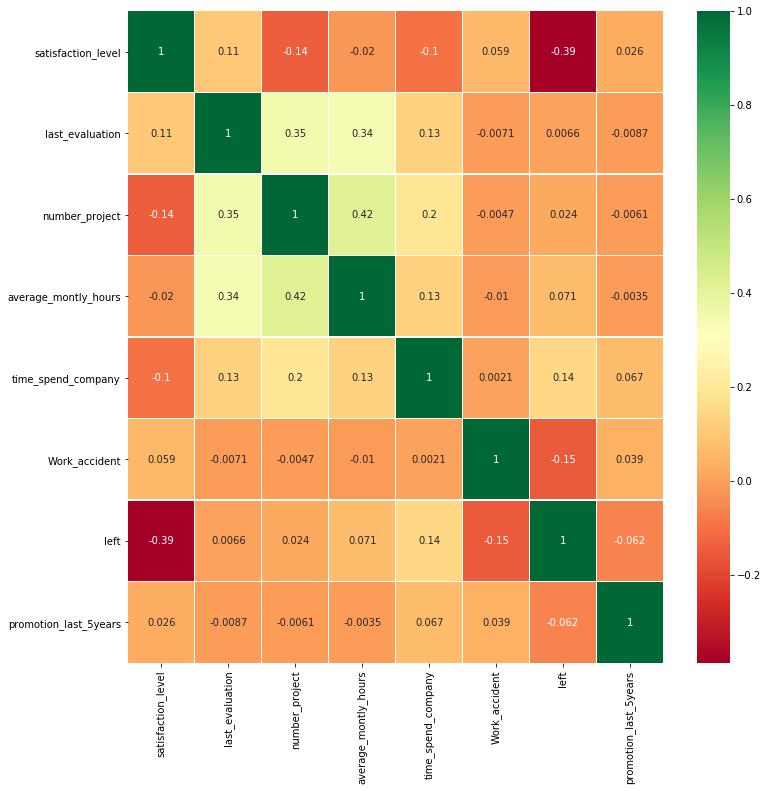

In [21]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr() матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

In [22]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [23]:
# сколько работников работает в каждом департаменте
data.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

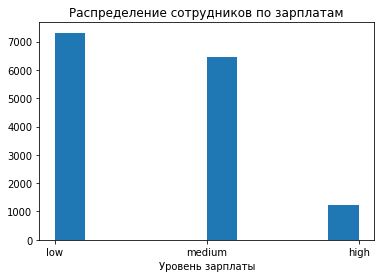

In [27]:
# распределение сотрудников по зарплатам
salary = data.salary
plt.hist(salary)
_ = plt.xlabel('Уровень зарплаты')
_ = plt.title('Распределение сотрудников по зарплатам')

In [70]:
# сколько сотрудников покинули компанию

left = data[data['left']==1].left.value_counts()
print(left)


1    3571
Name: left, dtype: int64


In [54]:
import numpy as np

In [60]:
salary_by_dept = data[['salary','sales']]
salary_by_dept['qty'] = 1
# salary_by_dept_grouped = salary_by_dept.groupby(['sales','salary'])['salary'].count()
salary_by_dept.columns = ['department','salary','qty']
# salary_by_dept.head(50)

pivot_df = salary_by_dept.pivot_table(index='salary', columns='department', values='qty', aggfunc=np.sum)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


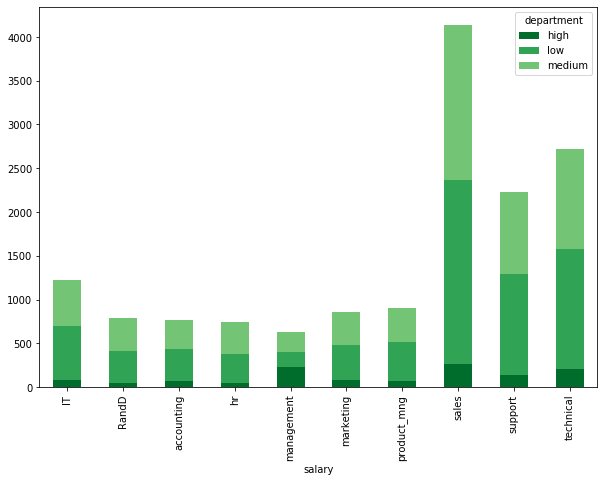

In [61]:
colors = ["#009ldf", "#66b512","#74C476"]

pivot_df.plot.bar(stacked=True, color=colors, figsize=(10,7))

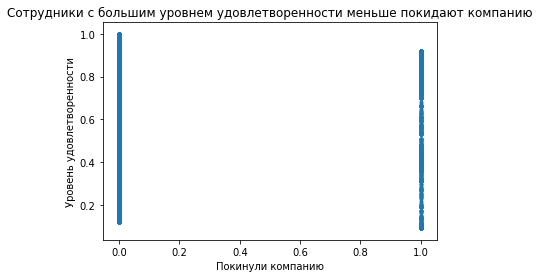

In [71]:
x = data.left
y = data.satisfaction_level

plt.scatter(x,y, marker = '.')
_ = plt.xlabel('Покинули компанию')
_ = plt.ylabel('Уровень удовлетворенности')
_ = plt.title('Сотрудники с большим уровнем удовлетворенности меньше покидают компанию')

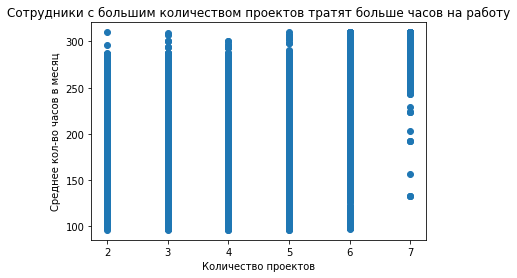

In [73]:
x = data.number_project
y = data.average_montly_hours

plt.scatter(x,y)
_ = plt.xlabel('Количество проектов')
_ = plt.ylabel('Среднее кол-во часов в месяц')
_ = plt.title('Сотрудники с большим количеством проектов тратят больше часов на работу')

In [74]:
from scipy import stats

In [75]:
# t-test для проверки взаимосвязи между переменными 

stats.ttest_ind(data.left, data.satisfaction_level)

Ttest_indResult(statistic=-93.06077566920372, pvalue=0.0)

Так как pvalue=0, мы можем сказать, что имеется статистическое отличие между атрибутами и оно значительное 

In [76]:
# t-test для проверки взаимосвязи между переменными 

stats.ttest_ind(data.left, data.time_spend_company)

Ttest_indResult(statistic=-262.50803476202543, pvalue=0.0)

In [77]:
# t-test для проверки взаимосвязи между переменными 

stats.ttest_ind(data.promotion_last_5years, data.time_spend_company)

Ttest_indResult(statistic=-290.22053428891604, pvalue=0.0)

In [80]:
import researchpy as rp

In [82]:
descriptives, results = rp.ttest(data.left, data.time_spend_company)
print(descriptives)
print('_______________________________________')
print(results)

             Variable        N      Mean        SD        SE  95% Conf.  \
0                left  14999.0  0.238083  0.425924  0.003478   0.231266   
1  time_spend_company  14999.0  3.498233  1.460136  0.011922   3.474864   
2            combined  29998.0  1.868158  1.952921  0.011276   1.846057   

   Interval  
0  0.244899  
1  3.521602  
2  1.890258  
_______________________________________
                          Independent t-test     results
0  Difference (left - time_spend_company) =      -3.2602
1                      Degrees of freedom =   29996.0000
2                                       t =    -262.5080
3                   Two side test p value =       0.0000
4                  Difference < 0 p value =       0.0000
5                  Difference > 0 p value =       1.0000
6                               Cohen's d =      -3.0313
7                               Hedge's g =      -3.0312
8                           Glass's delta =      -7.6543
9                                

In [84]:
# протестируем гипотезу, что те, кто не получал повышения последние 5 лет, увольняются чаще
nopromo = data[data['promotion_last_5years']==0].left
yespromo = data[data['promotion_last_5years']!=0].left

descriptives, results = rp.ttest(nopromo, yespromo)
print(descriptives)
print('_______________________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left  14680.0  0.241962  0.428286  0.003535   0.235033  0.248891
1      left    319.0  0.059561  0.237044  0.013272   0.033449  0.085673
2  combined  14999.0  0.238083  0.425924  0.003478   0.231266  0.244899
_______________________________________
            Independent t-test     results
0  Difference (left - left) =       0.1824
1        Degrees of freedom =   14997.0000
2                         t =       7.5812
3     Two side test p value =       0.0000
4    Difference < 0 p value =       1.0000
5    Difference > 0 p value =       0.0000
6                 Cohen's d =       0.4291
7                 Hedge's g =       0.4290
8             Glass's delta =       0.4259
9                         r =       0.0618


In [85]:
# протестируем гипотезу, что те, кто получает низкую зарплату, увольняются чаще
lowsalary = data[data['salary']=='low'].left
notlowsalary = data[data['salary']!='low'].left

descriptives, results = rp.ttest(lowsalary, notlowsalary)
print(descriptives)
print('_______________________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left   7316.0  0.296884  0.456916  0.005342   0.286412  0.307355
1      left   7683.0  0.182090  0.385944  0.004403   0.173459  0.190722
2  combined  14999.0  0.238083  0.425924  0.003478   0.231266  0.244899
_______________________________________
            Independent t-test     results
0  Difference (left - left) =       0.1148
1        Degrees of freedom =   14997.0000
2                         t =      16.6501
3     Two side test p value =       0.0000
4    Difference < 0 p value =       1.0000
5    Difference > 0 p value =       0.0000
6                 Cohen's d =       0.2720
7                 Hedge's g =       0.2720
8             Glass's delta =       0.2512
9                         r =       0.1347


In [97]:
# протестируем гипотезу, что те, кто работает в Sales, увольняются чаще
salesdept = data[data['sales']=='sales'].left
notsalesdept = data[data['sales']!='sales'].left

descriptives, results = rp.ttest(salesdept, notsalesdept)
print(descriptives)
print('_______________________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left   4140.0  0.244928  0.430096  0.006684   0.231822  0.258033
1      left  10859.0  0.235473  0.424314  0.004072   0.227491  0.243454
2  combined  14999.0  0.238083  0.425924  0.003478   0.231266  0.244899
_______________________________________
            Independent t-test     results
0  Difference (left - left) =       0.0095
1        Degrees of freedom =   14997.0000
2                         t =       1.2153
3     Two side test p value =       0.2243
4    Difference < 0 p value =       0.8879
5    Difference > 0 p value =       0.1121
6                 Cohen's d =       0.0222
7                 Hedge's g =       0.0222
8             Glass's delta =       0.0220
9                         r =       0.0099


0.6128335222348166
0.09
1.0


(array([ 972.,  363.,  270.,  228.,  167.,  310.,  814.,  964.,  495.,
         976.,  977.,  798.,  953.,  815., 1215.,  900., 1129.,  869.,
         939.,  845.]),
 array([0.09  , 0.1355, 0.181 , 0.2265, 0.272 , 0.3175, 0.363 , 0.4085,
        0.454 , 0.4995, 0.545 , 0.5905, 0.636 , 0.6815, 0.727 , 0.7725,
        0.818 , 0.8635, 0.909 , 0.9545, 1.    ]),
 <a list of 20 Patch objects>)

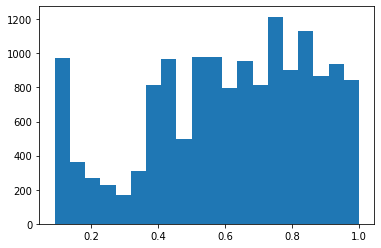

In [91]:
print(data.satisfaction_level.mean())
print(data.satisfaction_level.min())
print(data.satisfaction_level.max())
plt.hist(data.satisfaction_level, bins=20)

In [96]:
# протестируем гипотезу, что те, кто удовлетворен работой менее, чем 0,6, увольняются чаще
lowsatisf = data[data['satisfaction_level']<=0.2].left
highsatisf = data[data['satisfaction_level']>0.2].left

descriptives, results = rp.ttest(lowsatisf, highsatisf)
print(descriptives)
print('_______________________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left   1478.0  0.625169  0.484243  0.012596   0.600462  0.649877
1      left  13521.0  0.195770  0.396807  0.003413   0.189081  0.202459
2  combined  14999.0  0.238083  0.425924  0.003478   0.231266  0.244899
_______________________________________
            Independent t-test     results
0  Difference (left - left) =       0.4294
1        Degrees of freedom =   14997.0000
2                         t =      38.5811
3     Two side test p value =       0.0000
4    Difference < 0 p value =       1.0000
5    Difference > 0 p value =       0.0000
6                 Cohen's d =       1.0570
7                 Hedge's g =       1.0569
8             Glass's delta =       0.8867
9                         r =       0.3005
